<a href="https://colab.research.google.com/github/Thivadee19/Machine-Learning_Advance-Data-Analytic_Assignment-/blob/main/Thivadee_Final_project_Alexa_reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t',names=['rating','date','variation','message','class'])

In [134]:
data_df.head()

,rating,data,variation,message,class
0,rating,date,variation,verified_reviews,feedback
1,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
4,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [16]:
data_df['message'][0]

'verified_reviews'

In [17]:
len(data_df['message'][1])

13

In [19]:
data_df.shape

(3151, 2)

In [20]:
data_df.columns

Index(['message', 'class'], dtype='object')

In [21]:
missing_values = ["n/a", "na", "--", "?"]

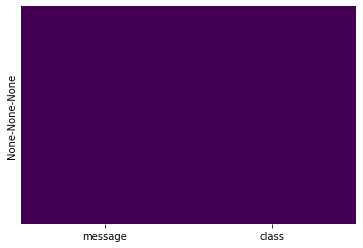

In [27]:
sns.heatmap(data_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
data_df.isnull()

message  class
rating date      variation           False  False
5      31-Jul-18 Charcoal Fabric     False  False
                 Charcoal Fabric     False  False
4      31-Jul-18 Walnut Finish       False  False
5      31-Jul-18 Charcoal Fabric     False  False
...                                    ...    ...
       30-Jul-18 Black  Dot          False  False
                 Black  Dot          False  False
                 Black  Dot          False  False
                 White  Dot          False  False
4      29-Jul-18 Black  Dot          False  False

[3151 rows x 2 columns]

In [29]:
data_df.describe()

,message,class
count,3151,3151
unique,2302,3
top,,1
freq,79,2893


In [162]:
!pip install pandas-profiling==2.7.1
import pandas_profiling as pp
pp.ProfileReport(data_df)
##Checking the overall summarry from the data. by doing this one is help me a lot by giving me quick summarry to understand the data in overall.

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

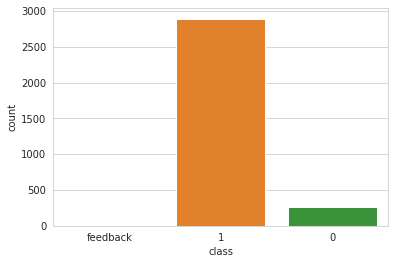

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='class', data=data_df)
##there is a lot of the class 1 much more than class 0

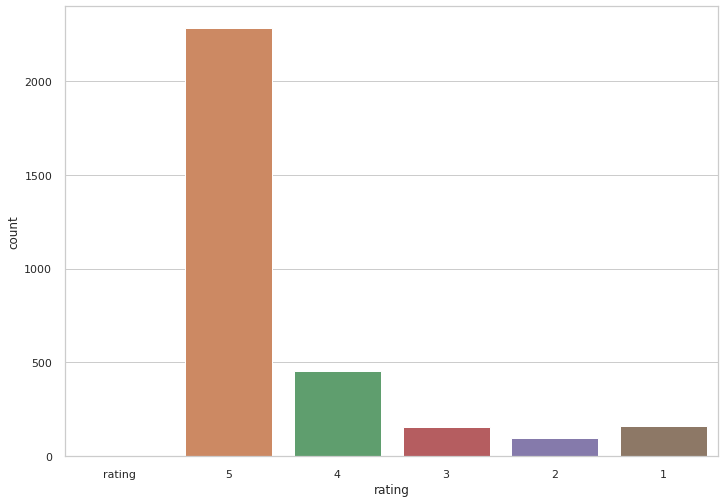

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='rating', data=data_df)
## From this chart I can see what is the most rating for the review which rate '5' and the lowest rate is rate '2'. Ps, rate 3 and rate 1 show pretty close high for the tall bar but acually the rate 1 is more than rate 3. rate 1 is 161 and rate 3 is 152 reviews. 

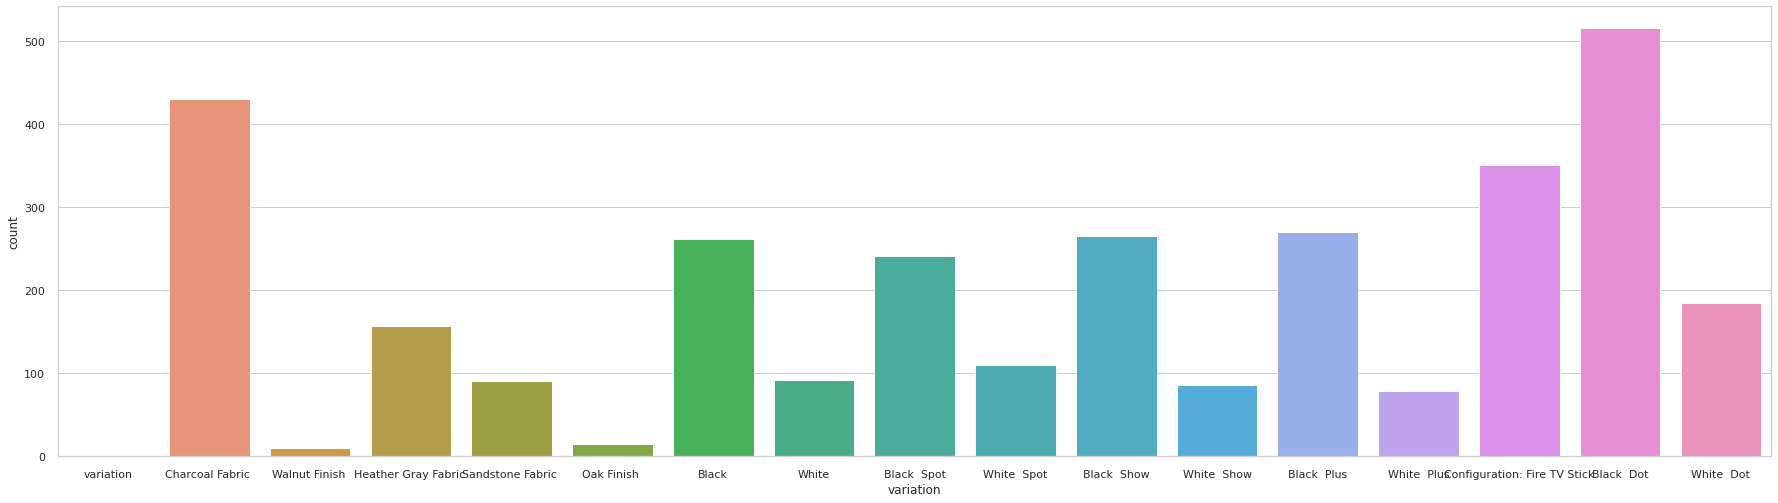

In [157]:
sns.set_style('whitegrid')
sns.countplot(x='variation', data=data_df)
sns.set(rc={'figure.figsize':(30.7,25.27)})
##The was very small when first run this code and very hard to see the name tag below so, I have tgo adjust the size of the chart and now I can see that most popular color is Black dot and follow by the Charcoal fabric and so on.

In [46]:
max(data_df['message'].apply(len))

2851

In [47]:
data_df.shape

(3151, 2)

In [48]:
import string

In [50]:
remove_punct = [char for char in data_df.message.iloc[0] if char not in string.punctuation]

In [51]:
remove_punct = ''.join(remove_punct)

In [52]:
remove_punct

'verifiedreviews'

In [53]:
len(remove_punct)

15

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords

In [56]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [57]:
remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]

In [58]:
##Remove stopwards 
len(remove_stopwords)

1

In [59]:
len(remove_punct)

15

In [60]:
## Processing the data 
def message_text_pre_process(text_message):
  remove_punct = [char for char in text_message if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords


In [61]:
data_df['message'].head(10).apply(message_text_pre_process)

rating  date       variation                                               [verifiedreviews]
5       31-Jul-18  Charcoal Fabric                                              [Love, Echo]
                   Charcoal Fabric                                                   [Loved]
4       31-Jul-18  Walnut Finish           [Sometimes, playing, game, answer, question, c...
5       31-Jul-18  Charcoal Fabric         [lot, fun, thing, 4, yr, old, learns, dinosaur...
                   Charcoal Fabric                                                   [Music]
                   Heather Gray Fabric     [received, echo, gift, needed, another, Blueto...
3       31-Jul-18  Sandstone Fabric        [Without, cellphone, cannot, use, many, featur...
5       31-Jul-18  Charcoal Fabric         [think, 5th, one, Ive, purchased, Im, working,...
        30-Jul-18  Heather Gray Fabric                                        [looks, great]
Name: message, dtype: object

In [62]:
data_df.head()

message     class
rating date      variation                                          verified_reviews  feedback
5      31-Jul-18 Charcoal Fabric                                       Love my Echo!         1
                 Charcoal Fabric                                           Loved it!         1
4      31-Jul-18 Walnut Finish     Sometimes while playing a game, you can answer...         1
5      31-Jul-18 Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...         1

In [63]:
data_df.shape

(3151, 2)

In [64]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
bag_of_words = CountVectorizer(analyzer=message_text_pre_process).fit(data_df['message'])

In [66]:
bag_of_words_trf = bag_of_words.transform(data_df['message'])

In [69]:
##TF-DIF
from sklearn.feature_extraction.text import TfidfTransformer

In [70]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [71]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

In [72]:
##Model Building
from sklearn.naive_bayes import MultinomialNB

In [73]:
data_df.head()

message     class
rating date      variation                                          verified_reviews  feedback
5      31-Jul-18 Charcoal Fabric                                       Love my Echo!         1
                 Charcoal Fabric                                           Loved it!         1
4      31-Jul-18 Walnut Finish     Sometimes while playing a game, you can answer...         1
5      31-Jul-18 Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...         1

In [74]:
spam_detector_model = MultinomialNB().fit(tfidf_trf,data_df['class'])

In [75]:
test_message = data_df['message'][10]

In [76]:
bag_of_words_test_message = bag_of_words.transform([test_message])

In [77]:
tfidf_test_messsge = tfidf_fit.transform(bag_of_words_test_message)
spam_detector_model.predict(tfidf_test_messsge)[0]

'1'

In [80]:
data_df['class'][0]

'feedback'

In [81]:
data_df.head()


message     class
rating date      variation                                          verified_reviews  feedback
5      31-Jul-18 Charcoal Fabric                                       Love my Echo!         1
                 Charcoal Fabric                                           Loved it!         1
4      31-Jul-18 Walnut Finish     Sometimes while playing a game, you can answer...         1
5      31-Jul-18 Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...         1

In [82]:
prediction_for_all_messages = spam_detector_model.predict(tfidf_trf)
from sklearn.metrics import classification_report
print(classification_report(data_df['class'],prediction_for_all_messages))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       257
           1       0.92      1.00      0.96      2893
    feedback       0.00      0.00      0.00         1

    accuracy                           0.92      3151
   macro avg       0.64      0.34      0.34      3151
weighted avg       0.93      0.92      0.89      3151



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
data_df

message     class
rating date      variation                                          verified_reviews  feedback
5      31-Jul-18 Charcoal Fabric                                       Love my Echo!         1
                 Charcoal Fabric                                           Loved it!         1
4      31-Jul-18 Walnut Finish     Sometimes while playing a game, you can answer...         1
5      31-Jul-18 Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...         1
...                                                                              ...       ...
       30-Jul-18 Black  Dot        Perfect for kids, adults and everyone in betwe...         1
                 Black  Dot        Listening to music, searching locations, check...         1
                 Black  Dot        I do love these things, i have them running my...         1
                 White  Dot        Only complaint I have is that the sound qualit...         1
4      29-Jul-18 Black  Dot                                                     Good         1

[3151 rows x 2 columns]

In [105]:
##Train Test  Split
from sklearn.model_selection import train_test_split
msg_train, msg_test, class_train, class_test = train_test_split(data_df['message'],data_df['class']) 

In [106]:
print(msg_train.shape)
print(msg_test.shape)
print(class_train.shape)
print(class_test.shape)

(2363,)
(788,)
(2363,)
(788,)


In [107]:
##Pipeline
from sklearn.pipeline import Pipeline

In [108]:
text_pipeline = Pipeline([
                          ('bag_of_words',CountVectorizer(analyzer=message_text_pre_process)),
                          ('tfidf',TfidfTransformer()),
                          ('classifier', MultinomialNB())
])

In [109]:
text_pipeline.fit(msg_train,class_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function message_text_pre_process at 0x7f8cb457e4d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [110]:
text_pred = text_pipeline.predict(msg_test)

In [111]:
print(classification_report(text_pred,class_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       788
    feedback       0.00      0.00      0.00         0

    accuracy                           0.92       788
   macro avg       0.33      0.31      0.32       788
weighted avg       1.00      0.92      0.96       788



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
msg_test.iloc[0]

'What a blast!  We love Echo...  Just learning all the tricks but lots of fun and helpful too!'

In [113]:
class_test.iloc[0]

'1'

In [114]:
text_pred

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [115]:
class_test.iloc[1]

'1'

In [116]:
class_test

5  26-Jul-18  White  Plus                     1
4  28-Jul-18  Black  Show                     1
5  29-Jul-18  Charcoal Fabric                 1
   30-Jul-18  Configuration: Fire TV Stick    1
              Black  Dot                      1
                                             ..
   28-Jul-18  Black  Show                     1
   29-Jul-18  Charcoal Fabric                 1
   22-Jul-18  White                           1
   30-Jul-18  Black  Dot                      1
3  30-Jul-18  Configuration: Fire TV Stick    1
Name: class, Length: 788, dtype: object

In [117]:
##faeature scaling 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [118]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'F1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'F2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

In [119]:
x.head()

,F1,F2
0,19.819455,28.968058
1,18.151334,29.546195
2,20.614990,29.360912
3,20.474753,28.191453
4,22.374683,28.267819


In [120]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['F1', 'F2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['F1', 'F2'])

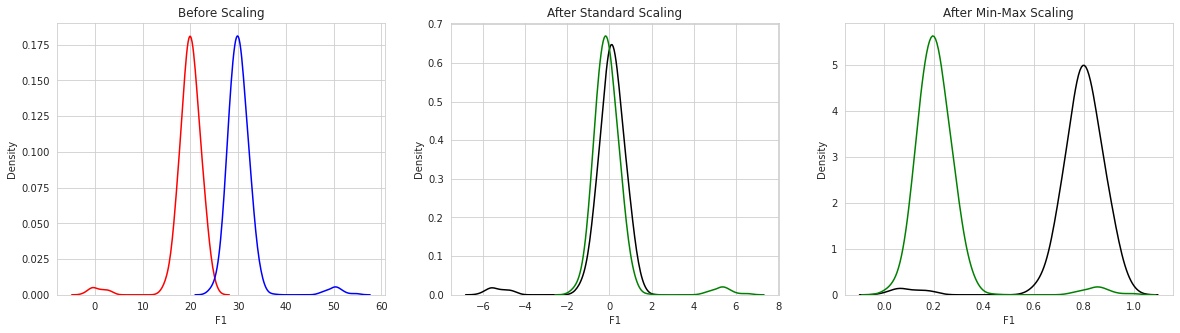

In [121]:
 fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['F1'], ax = ax1, color ='r')
sns.kdeplot(x['F2'], ax = ax1, color ='b')

ax2.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['F1'], ax = ax2, color ='black')
sns.kdeplot(standard_df['F2'], ax = ax2, color ='g')
ax3.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['F1'], ax = ax3, color ='black')
sns.kdeplot(minmax_df['F2'], ax = ax3, color ='g')
plt.show()

Consuions : 
  Overall summary for this data regarding the review rate, for rate '5' is the top from total 3151 dataset which is 2286. and follow by the rate 4 = 455 and rate 1 = 161 and so on. 

  Also, I noticed that the difference for class 1 and 0 id the rate. for whoever give rate 1 to the Alexa product will be class at 0 and other rate 2,3,4,5  will be class at 1. that is why we have so much more class 1 in this data set.

  For the variation shown that top one is Black Dot for 516 and Charcoal Fabric for 430 and Fire TV stick 350 and ect.. but the lowest one is Walnut Finish which is pretty surprised me. because I think it's look pretty good..

  Regarding the ML that choosed have the accuracy at 92. which is pretty high. and I did the feature scaling at the end to see the different. 